In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/cybersecurity_attacks.csv")

In [5]:
df.head(10)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Data,HTTP,Repellat quas illum harum fugit incidunt exerc...,...,Logged,Medium,Zeeshan Viswanathan,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,Segment C,"Aurangabad, Meghalaya",NaN,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Data,DNS,Qui numquam inventore repellat ratione fugit o...,...,Ignored,High,Ehsaan Dalal,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Segment A,"Eluru, Manipur",NaN,Log Data,NaN,Server
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,...,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
8,2023-06-27 11:02:56,49.32.208.167,72.202.237.9,56296,20857,TCP,1281,Control,FTP,Veritatis nihil amet atque molestias aperiam m...,...,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Segment B,"Ambala, Tripura",NaN,Log Data,Alert Data,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Data,HTTP,Consequatur ipsum autem reprehenderit quae. Do...,...,Blocked,Medium,Mishti Chaudhuri,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,Segment A,"Rampur, Mizoram",87.128.245.244,NaN,NaN,Server


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  str    
 1   Source IP Address       40000 non-null  str    
 2   Destination IP Address  40000 non-null  str    
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  str    
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  str    
 8   Traffic Type            40000 non-null  str    
 9   Payload Data            40000 non-null  str    
 10  Malware Indicators      20000 non-null  str    
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  str    
 13  Attack Type             40000 non-null  str    
 14  Attack Signature        40000 non-null  str    
 

In [7]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [36]:
temp_data = df.isna().sum().sort_values(ascending=False).to_frame("Missing Values")
temp_data["Percentage"] = (temp_data["Missing Values"] / 40000 * 100).round(2)
temp_data.head(10)

,Missing Values,Percentage
Alerts/Warnings,20067,50.17
IDS/IPS Alerts,20050,50.12
Malware Indicators,20000,50.00
Firewall Logs,19961,49.90
Proxy Information,19851,49.63
Destination Port,0,0.00
Source Port,0,0.00
Protocol,0,0.00
Packet Length,0,0.00
Traffic Type,0,0.00


There are only 5 features with missing data. <br> 
All of them are related to the detection of the cyber-attack at some point of the process.

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


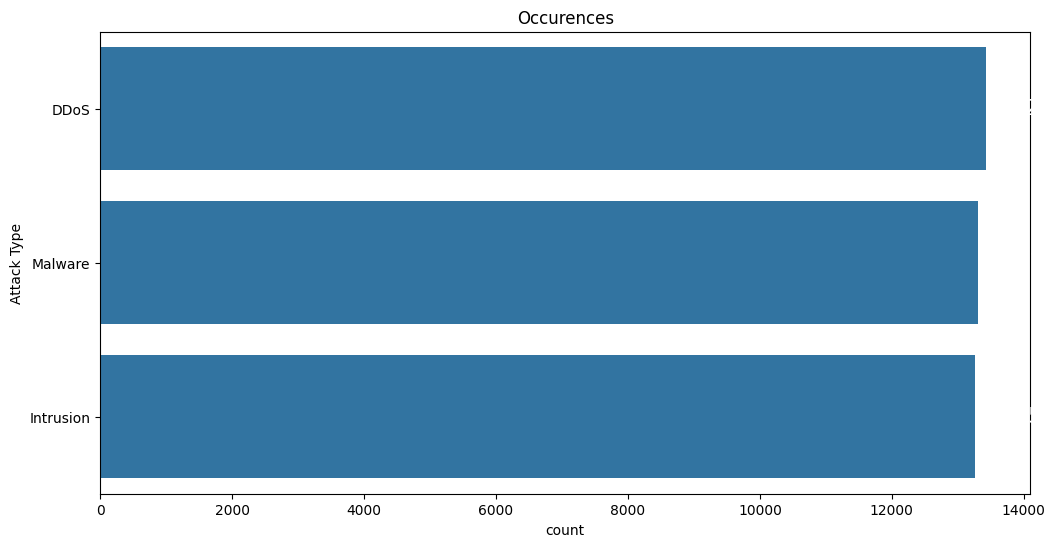

In [41]:
print(df['Attack Type'].value_counts())

fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, y='Attack Type', order=df['Attack Type'].value_counts().index)
ax.bar_label(ax.containers[0], color="white", fontsize=15)
plt.title('Occurences')
plt.show(fig)

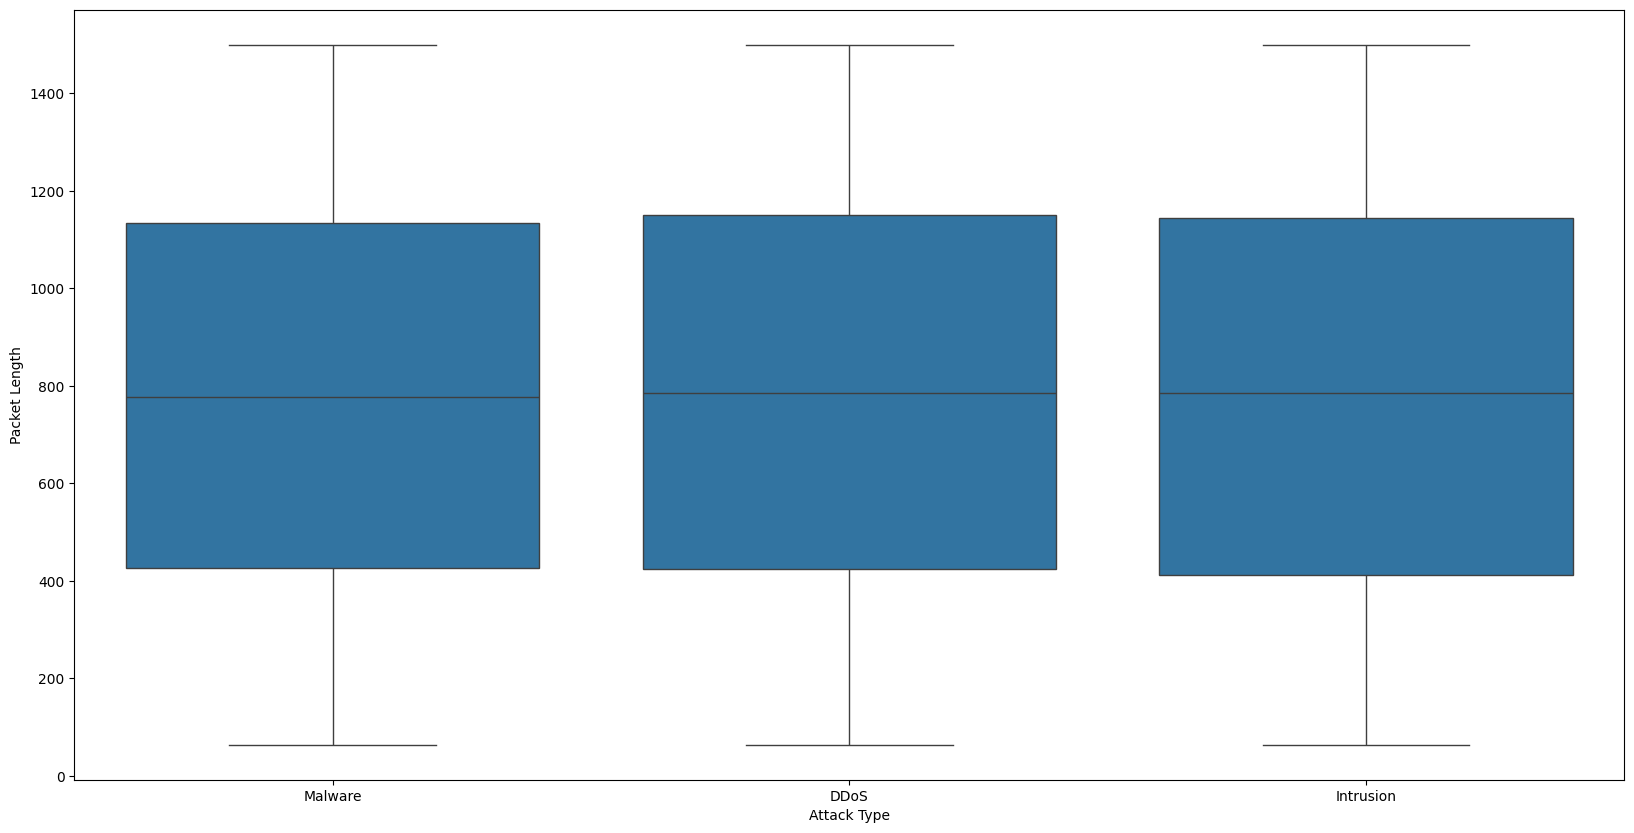

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Attack Type'],y=df['Packet Length'])
plt.show()

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']) # Converts text → date/time
df['hour'] = df['Timestamp'].dt.hour # Extracts the hour of the day from the timestamp col.
df['day'] = df['Timestamp'].dt.day # Gets day of month

In [13]:
df.groupby('hour')['Attack Type'].value_counts()

hour  Attack Type
0     DDoS           604
      Malware        557
      Intrusion      544
1     DDoS           567
      Malware        532
                    ... 
22    Intrusion      530
      Malware        525
23    Malware        573
      DDoS           551
      Intrusion      533
Name: count, Length: 72, dtype: int64

In [14]:
day_attacks = df[(df['hour'] >= 8) & (df['hour'] < 20)] # rows between 08:00am  and 19:59pm
night_attacks = df[(df['hour'] < 8) | (df['hour'] >= 20)]# attacks between midnight and 7:59 AM or attacks between 8 PM and 11:59 PM selects either of them

day_attacks.groupby(['Attack Type'] ).size()

Attack Type
DDoS         6649
Intrusion    6668
Malware      6725
dtype: int64

In [15]:
print("day_attacks:", len(day_attacks))
print("night_attacks:", len(night_attacks))

day_attacks: 20042
night_attacks: 19958


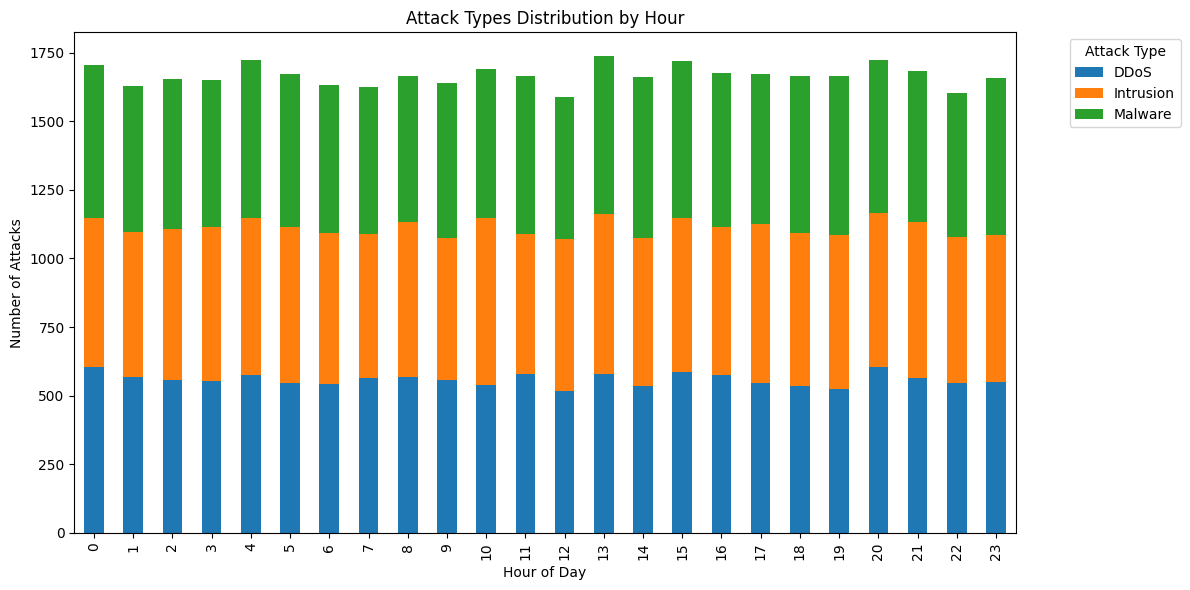

In [16]:
# Group and reshape data
hour_attack = (
    df.groupby('hour')['Attack Type']
    .value_counts()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
hour_attack.plot(
    kind='bar',
    figsize=(12, 6),
    stacked=True
)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Attacks')
plt.title('Attack Types Distribution by Hour')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Axes: >

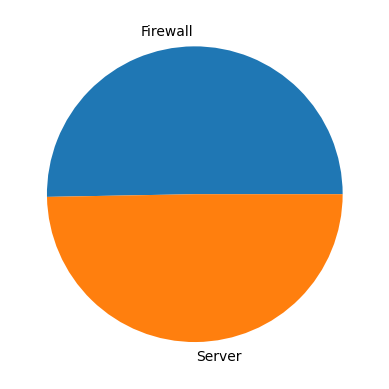

In [17]:
df['Log Source'].value_counts().plot(kind='pie' )

In [18]:
df['Traffic Type'].value_counts()

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

<Axes: xlabel='Action Taken'>

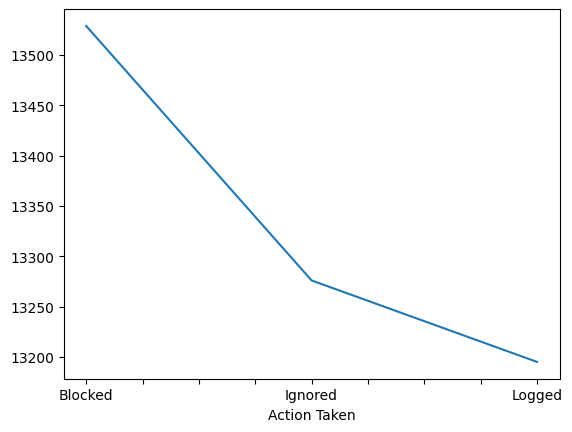

In [19]:
df['Action Taken'].value_counts().plot(kind='line')

<Axes: xlabel='Severity Level'>

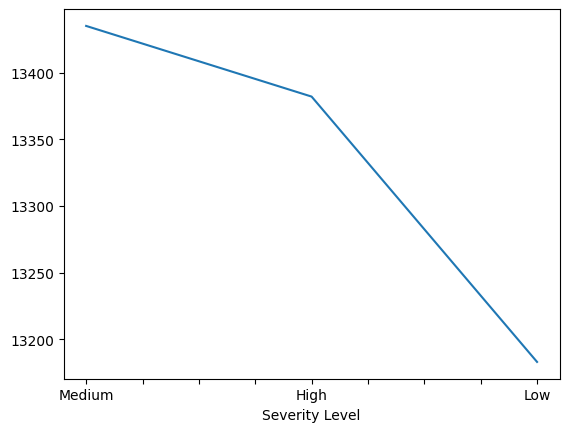

In [20]:
df['Severity Level'].value_counts().plot(kind='line')

<Axes: ylabel='Frequency'>

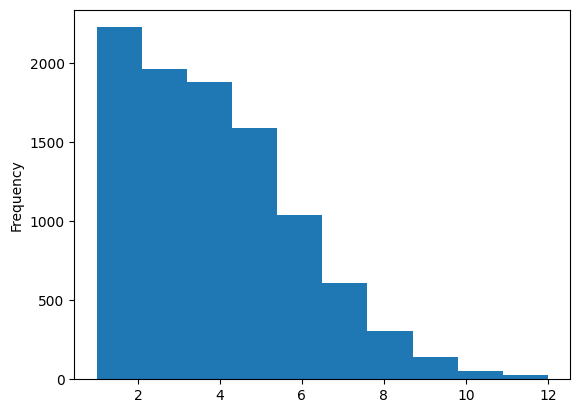

In [21]:
df['Anomaly Scores'].value_counts().plot(kind='hist')

In [22]:
df['Protocol'].value_counts()

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [23]:
df['Log Source'].value_counts() 

Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64

In [24]:
df['Geo-location Data'].value_counts()

Geo-location Data
Ghaziabad, Meghalaya          16
Kalyan-Dombivli, Jharkhand    15
Ghaziabad, Tripura            14
Ghaziabad, Uttarakhand        14
Ghaziabad, Jharkhand          13
                              ..
Purnia, Uttar Pradesh          1
Cuttack, Sikkim                1
Vadodara, Meghalaya            1
Cuttack, Jharkhand             1
Nagpur, Punjab                 1
Name: count, Length: 8723, dtype: int64

Packet Length
1037    47
104     45
1278    45
480     44
855     44
        ..
707     15
470     14
568     14
216     12
940      9
Name: count, Length: 1437, dtype: int64


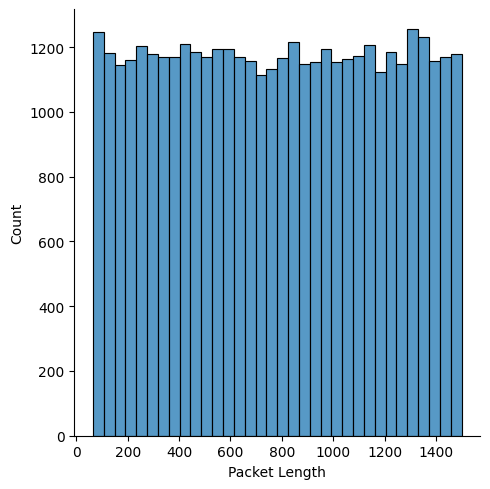

In [25]:
print(df['Packet Length'].value_counts())

sns.displot(df['Packet Length'])

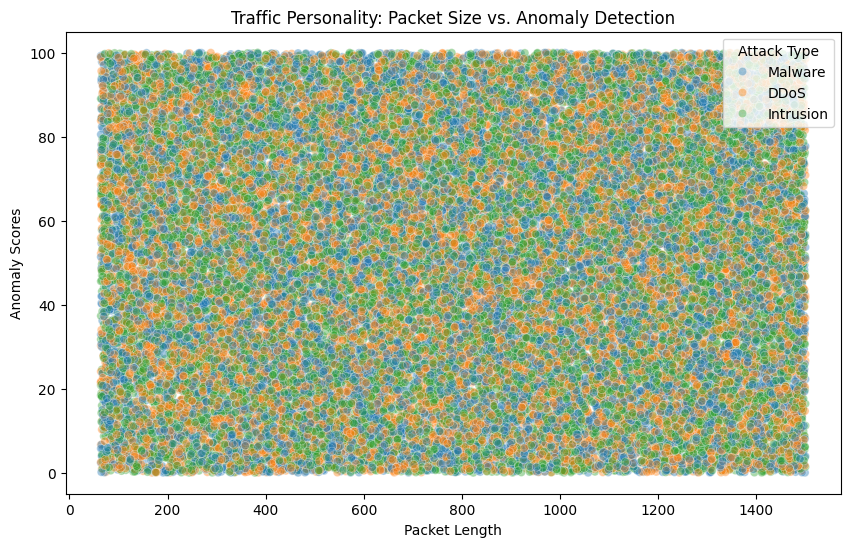

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Packet Length', y='Anomaly Scores', hue='Attack Type', alpha=0.4)
plt.title("Traffic Personality: Packet Size vs. Anomaly Detection")
plt.show()

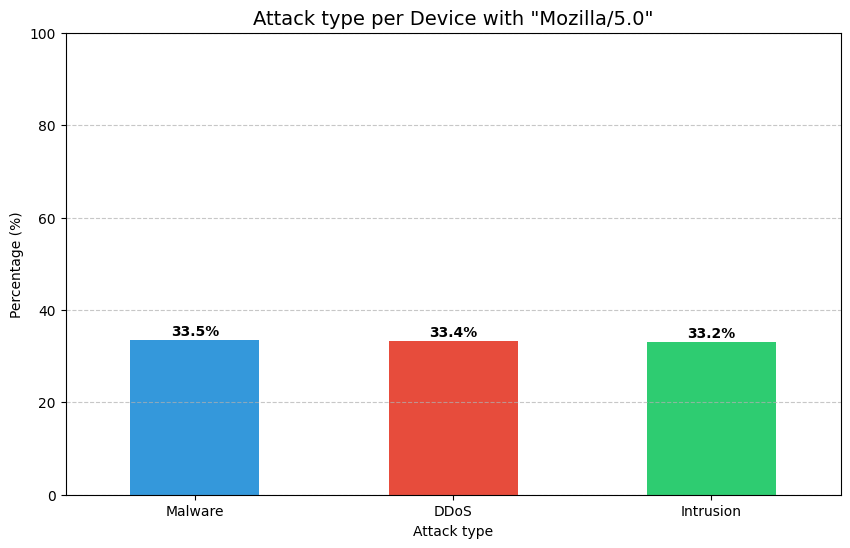

In [27]:
df['Device_Simple'] = df['Device Information'].str.split('(').str[0].str.strip()

df_mozilla = df[df['Device_Simple'] == 'Mozilla/5.0']

mozilla_attack_ratios = df_mozilla['Attack Type'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
mozilla_attack_ratios.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71', '#f1c40f'])

plt.title('Attack type per Device with "Mozilla/5.0"', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Attack type')
plt.xticks(rotation=0)

for i, v in enumerate(mozilla_attack_ratios):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
import ipywidgets as widgets
from ipywidgets import interact

df_opera = df[df['Device Information'].str.contains('Opera|OPR', case=False, na=False)].copy()

df_opera['Filtered'] = df_opera['Device Information'].str.extract(r'((?:Opera|OPR)/[\d\.]+)')

available_versions = sorted(df_opera['Filtered'].dropna().unique())

In [29]:
@interact(version=available_versions)
def afficher_stats_opera(version):
    data_version = df_opera[df_opera['Filtered'] == version]

    if data_version.empty:
        print("No Data for this version")
        return

    ratios = data_version['Attack Type'].value_counts(normalize=True) * 100

    plt.figure(figsize=(10, 5))
    colors = sns.color_palette('magma', len(ratios))

    ratios.plot(kind='bar', color=colors)

    plt.title(f'Attack type per Device wit {version}', fontsize=14)
    plt.ylabel('Percentage (%)')
    plt.xlabel('Attack type')
    plt.ylim(0, 100)
    plt.xticks(rotation=0)

    for i, v in enumerate(ratios):
        plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()

    print(f"Count of attacks for this version : {len(data_version)}")

interactive(children=(Dropdown(description='version', options=('Opera/8.10.', 'Opera/8.11.', 'Opera/8.12.', 'O…

In [30]:
!pip install user-agents

In [31]:
from user_agents import parse
import pandas as pd
import plotly.express as px

def clean_ua_name(ua_string):
    ua = parse(str(ua_string))
    return f"{ua.browser.family} ({ua.os.family})"

df["Browser Name"] = df["Device Information"].apply(clean_ua_name)

fig = px.histogram(
    df, 
    x="Browser Name", 
    color="Attack Type", 
    barmode="group",
    title="Browser Name Distribution",
    width=1200, 
    height=600
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [32]:
chrome_version_data = pd.read_csv("chrome_versions.csv", sep=';')
chrome_version_data["release_date"] = pd.to_datetime(chrome_version_data["release_date"], format = "%d/%m/%Y")
chrome_version_data["version"] = chrome_version_data["version"].str.split(".",n = 1).str[0]

FileNotFoundError: [Errno 2] No such file or directory: 'chrome_versions.csv'

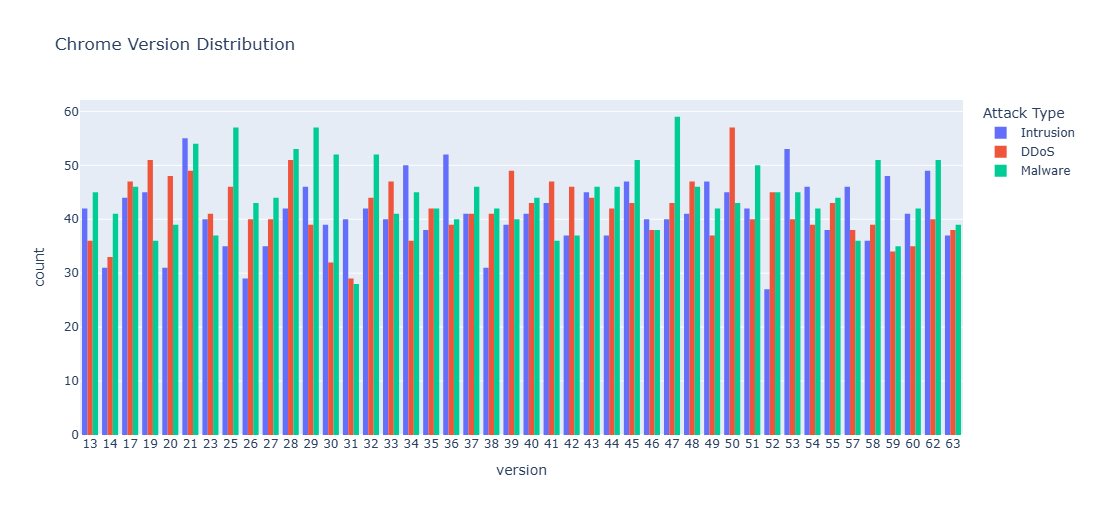

In [ ]:
from user_agents import parse
import pandas as pd
import plotly.express as px

def get_ua_details(ua_string):
    ua = parse(str(ua_string))
    return {
        "Browser Name": ua.browser.family,
        "Browser Version": ua.browser.version_string.split('.')[0] if ua.browser.version_string else "0"
    }

device_info = df["Device Information"].apply(lambda x: pd.Series(get_ua_details(x)))

chrome_version_data = pd.read_csv("chrome_versions.csv", sep=';')
chrome_version_data["version"] = chrome_version_data["version"].astype(str).str.split(".").str[0]

temp_data = device_info.reset_index(names=["Original Index"])
temp_data = temp_data[temp_data["Browser Name"] == "Chrome"].copy()

temp_data = temp_data.merge(chrome_version_data, left_on="Browser Version", right_on="version", how="left")
temp_data = temp_data.merge(df["Attack Type"], left_on="Original Index", right_index=True)

version_order = sorted(temp_data["version"].dropna().unique(), key=lambda x: int(x))

fig = px.histogram(
    temp_data, 
    x="version", 
    title="Chrome Version Distribution", 
    color="Attack Type", 
    barmode="group",
    width=1400,
    height=500
)

fig.update_xaxes(type="category", categoryorder="array", categoryarray=version_order)
fig.show()